In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install japanize_matplotlib  # Colab環境にjapanize_matplotlibをインストール
# その他のライブラリは、Colabではデフォルトで利用可能

import pandas as pd               # データを表のように扱うライブラリ
import numpy as np                # 数値計算を速くするライブラリ
import seaborn as sns             # きれいなグラフを簡単に作るライブラリ
import matplotlib.pyplot as plt   # グラフを作る基本的なライブラリ
%matplotlib inline
import japanize_matplotlib        # グラフに日本語を表示するライブラリ
japanize_matplotlib.japanize()

from sklearn.model_selection import train_test_split  # データを学習用とテスト用に分ける
from sklearn.metrics import roc_auc_score  # 評価の計算を行うライブラリ
from sklearn.preprocessing import StandardScaler  # 標準化の計算を行うライブラリ
import lightgbm as lgb

import warnings
warnings.simplefilter('ignore')  # 不要な警告を表示しない

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 37.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=d1dfbd1863ca3532911f07040d46faf888dd4778efa842feb49ed5160a0d47d4
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [3]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MUFGコンペ/data/train.csv', index_col=0)
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MUFGコンペ/data/test.csv', index_col=0)

In [4]:
train.head()

,purpose,int.rate,installment,annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,NaN,0.1691,652.10,29579.74,10.66,730,3333,4955.0,39.6,4,2,0,1
1,major_purchase,0.1354,191.27,52808.95,13.06,707,6063,12335.0,37.8,2,1,0,0
2,credit_card,0.0758,377.00,168689.22,11.98,736,2681,1505.0,5.0,1,0,0,0
3,debt_consolidation,0.1774,359.33,71325.19,20.55,702,3972,39536.0,94.1,1,0,0,0
4,credit_card,0.1430,875.45,130773.88,17.61,688,5555,17295.0,56.4,0,0,0,0


In [5]:
test.head()

,purpose,int.rate,installment,annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
40785,debt_consolidation,0.1543,225.68,16525.86,22.39,668,1960,43771.0,59.3,3,0,0
40786,debt_consolidation,0.1539,200.43,62412.73,21.84,660,5958,13607.0,87.0,1,1,0
40787,debt_consolidation,0.1503,252.35,42836.79,21.77,663,4950,1832.0,36.8,5,0,1
40788,debt_consolidation,0.1316,533.85,27821.44,10.60,690,1825,3597.0,60.0,0,0,0
40789,debt_consolidation,0.1506,484.50,91406.09,17.35,658,3253,12137.0,48.8,1,0,0


In [6]:
print('train shape', train.shape)
train.info()

train shape (40785, 13)
<class 'pandas.core.frame.DataFrame'>
Index: 40785 entries, 0 to 40784
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   purpose            40012 non-null  object 
 1   int.rate           40785 non-null  float64
 2   installment        40779 non-null  float64
 3   annual.inc         40785 non-null  float64
 4   dti                40785 non-null  float64
 5   fico               40785 non-null  int64  
 6   days.with.cr.line  40785 non-null  int64  
 7   revol.bal          40784 non-null  float64
 8   revol.util         40773 non-null  float64
 9   inq.last.6mths     40785 non-null  int64  
 10  delinq.2yrs        40785 non-null  int64  
 11  pub.rec            40785 non-null  int64  
 12  not.fully.paid     40785 non-null  int64  
dtypes: float64(6), int64(6), object(1)
memory usage: 4.4+ MB


In [7]:
print('test shape', test.shape)
test.info()

test shape (40786, 12)
<class 'pandas.core.frame.DataFrame'>
Index: 40786 entries, 40785 to 81570
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   purpose            40282 non-null  object 
 1   int.rate           40786 non-null  float64
 2   installment        40782 non-null  float64
 3   annual.inc         40786 non-null  float64
 4   dti                40786 non-null  float64
 5   fico               40786 non-null  int64  
 6   days.with.cr.line  40786 non-null  int64  
 7   revol.bal          40780 non-null  float64
 8   revol.util         40769 non-null  float64
 9   inq.last.6mths     40786 non-null  int64  
 10  delinq.2yrs        40786 non-null  int64  
 11  pub.rec            40786 non-null  int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 4.0+ MB


In [8]:
# prompt: train.isnull().sum()

train.isnull().sum()


,0
purpose,773
int.rate,0
installment,6
annual.inc,0
dti,0
fico,0
days.with.cr.line,0
revol.bal,1
revol.util,12
inq.last.6mths,0


In [9]:
test.isnull().sum()

,0
purpose,504
int.rate,0
installment,4
annual.inc,0
dti,0
fico,0
days.with.cr.line,0
revol.bal,6
revol.util,17
inq.last.6mths,0


In [10]:
train.describe()

,int.rate,installment,annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,40785.000000,40779.000000,4.078500e+04,40785.000000,40785.000000,40785.000000,40784.000000,40773.000000,40785.000000,40785.000000,40785.000000,40785.000000
mean,0.125414,302.329408,7.087001e+04,12.530579,709.393061,4736.481746,15426.217953,46.170792,1.543018,0.180998,0.039696,0.151870
std,0.030167,208.068861,6.524275e+04,6.831929,39.299297,2568.216636,22343.735674,28.257963,2.059082,0.513544,0.195246,0.358899
min,0.060800,15.680000,2.086720e+03,0.110000,615.000000,179.000000,1.000000,0.100000,0.000000,0.000000,0.000000,0.000000
25%,0.105300,157.400000,3.868640e+04,6.700000,679.000000,2965.000000,3433.000000,22.600000,0.000000,0.000000,0.000000,0.000000
50%,0.125200,241.140000,5.862029e+04,12.740000,703.000000,4304.000000,8441.000000,44.500000,1.000000,0.000000,0.000000,0.000000
75%,0.145100,391.995000,8.416863e+04,17.930000,737.000000,5896.000000,19085.500000,68.900000,2.000000,0.000000,0.000000,0.000000
max,0.800000,939.380000,1.913363e+06,29.930000,826.000000,16888.000000,356328.000000,108.300000,14.000000,3.000000,1.000000,1.000000


In [11]:
test.describe()

,int.rate,installment,annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
count,40786.00000,40782.000000,4.078600e+04,40786.000000,40786.000000,40786.000000,40780.000000,40769.000000,40786.00000,40786.000000,40786.000000
mean,0.12544,300.582001,7.019006e+04,12.552485,709.242338,4685.578556,15249.915571,46.423736,1.52876,0.179694,0.038739
std,0.03087,208.178433,6.145846e+04,6.836684,39.320390,2540.021093,22273.623474,28.320324,2.08263,0.513398,0.192974
min,0.06160,15.680000,2.128340e+03,0.090000,616.000000,181.000000,1.000000,0.100000,0.00000,0.000000,0.000000
25%,0.10540,155.790000,3.855412e+04,6.700000,679.000000,2928.250000,3367.000000,23.000000,0.00000,0.000000,0.000000
50%,0.12510,240.410000,5.814888e+04,12.760000,704.000000,4253.000000,8258.000000,44.700000,1.00000,0.000000,0.000000
75%,0.14510,388.420000,8.379708e+04,17.950000,736.750000,5834.000000,18688.250000,69.100000,2.00000,0.000000,0.000000
max,0.90000,938.860000,2.000790e+06,29.950000,826.000000,17416.000000,296156.000000,109.600000,14.00000,3.000000,1.000000


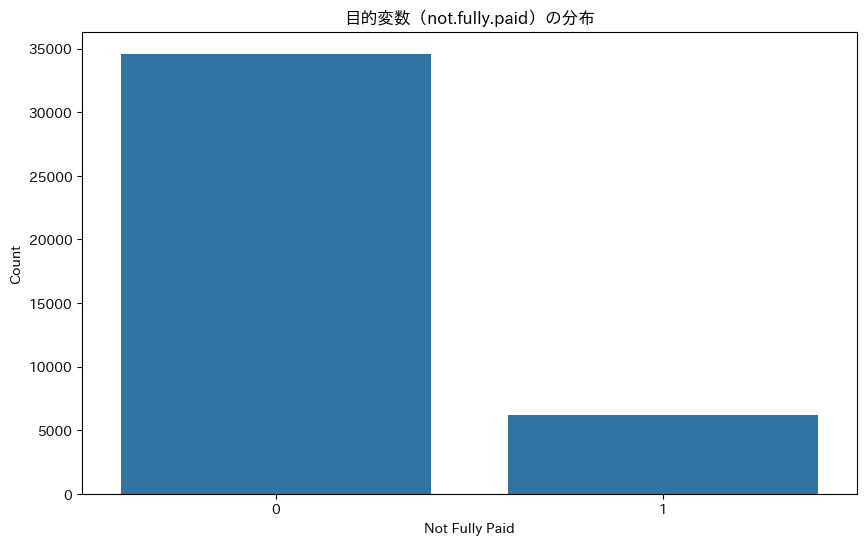

In [12]:
# 目的変数の分布
plt.figure(figsize=(10, 6))
sns.countplot(x='not.fully.paid', data=train)
plt.title('目的変数（not.fully.paid）の分布')
plt.xlabel('Not Fully Paid')
plt.ylabel('Count')
plt.show()

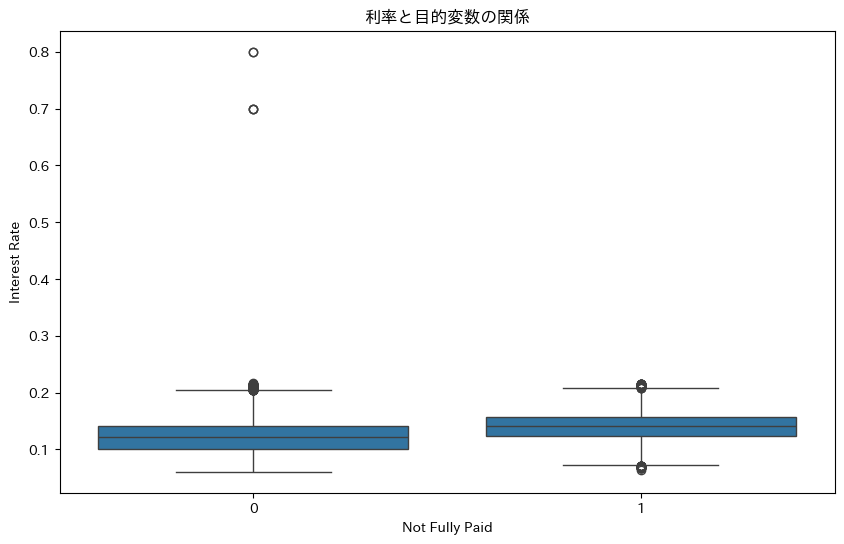

In [13]:
# 仮説1: 高い利率はローン未返済のリスクを増加させる
plt.figure(figsize=(10, 6))
sns.boxplot(x='not.fully.paid', y='int.rate', data=train)
plt.title('利率と目的変数の関係')
plt.xlabel('Not Fully Paid')
plt.ylabel('Interest Rate')
plt.show()

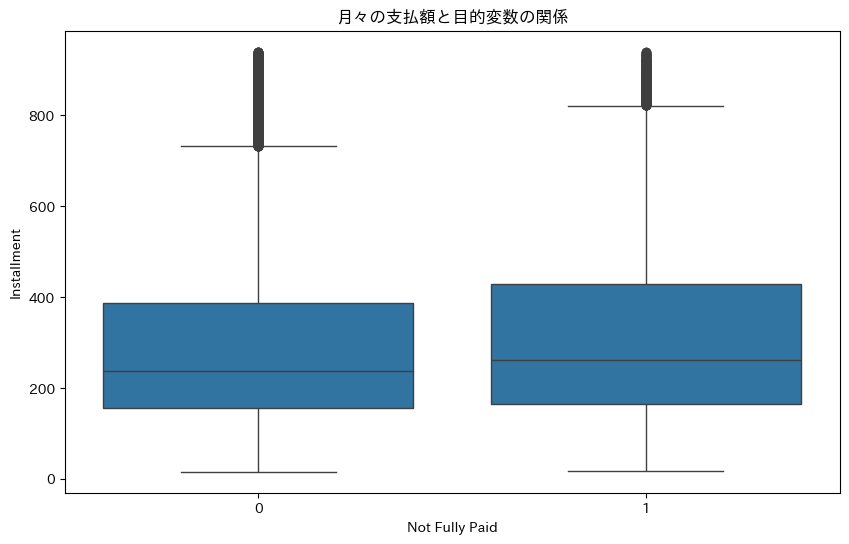

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='not.fully.paid', y='installment', data=train)
plt.title('月々の支払額と目的変数の関係')
plt.xlabel('Not Fully Paid')
plt.ylabel('Installment')
plt.show()

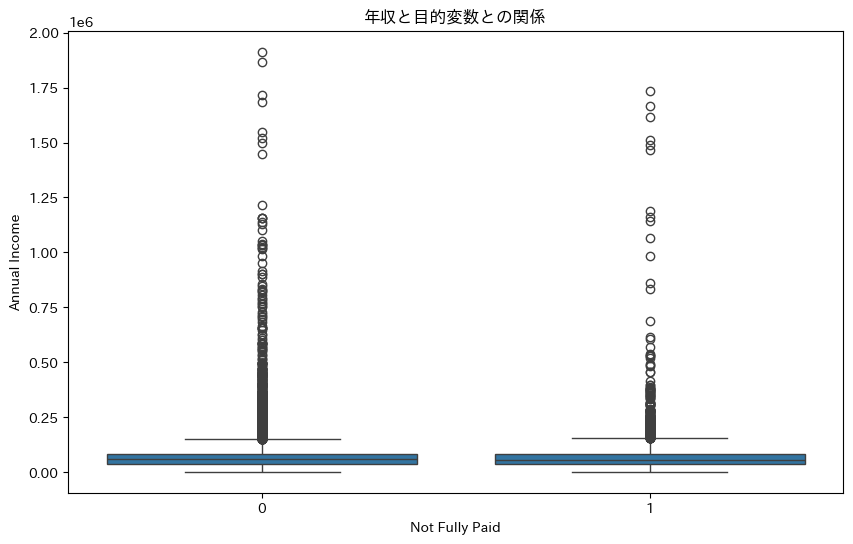

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='not.fully.paid', y='annual.inc', data=train)
plt.title('年収と目的変数との関係')
plt.xlabel('Not Fully Paid')
plt.ylabel('Annual Income')
plt.show()

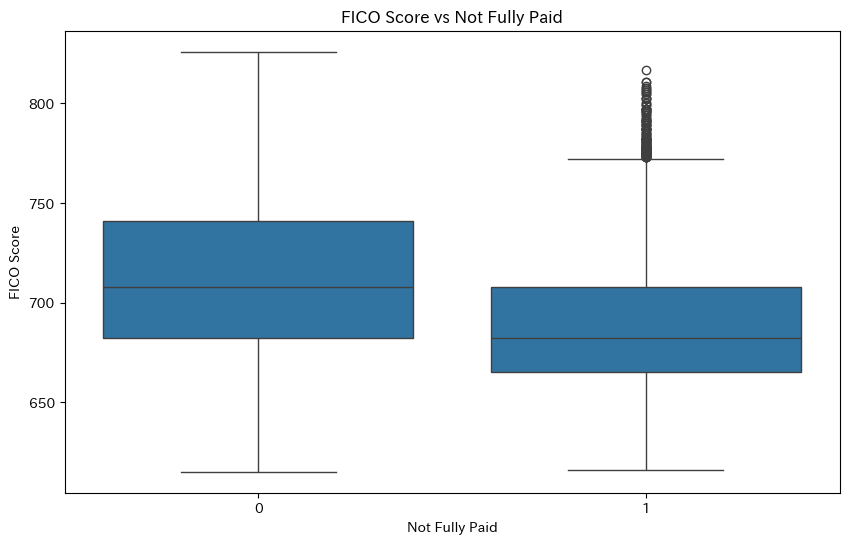

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='not.fully.paid', y='fico', data=train)
plt.title('FICO Score vs Not Fully Paid')
plt.xlabel('Not Fully Paid')
plt.ylabel('FICO Score')
plt.show()

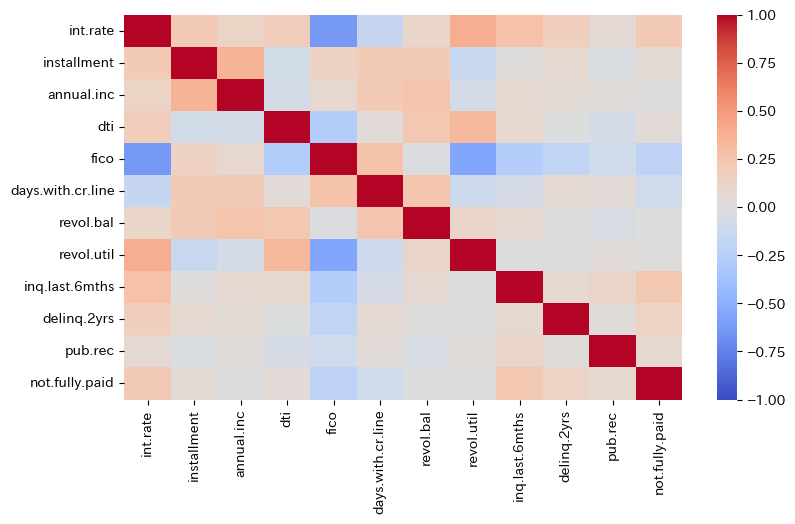

In [17]:
plt.figure(figsize=(9, 5))
sns.heatmap(train.select_dtypes(include=['int64', 'float64']).corr(), cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

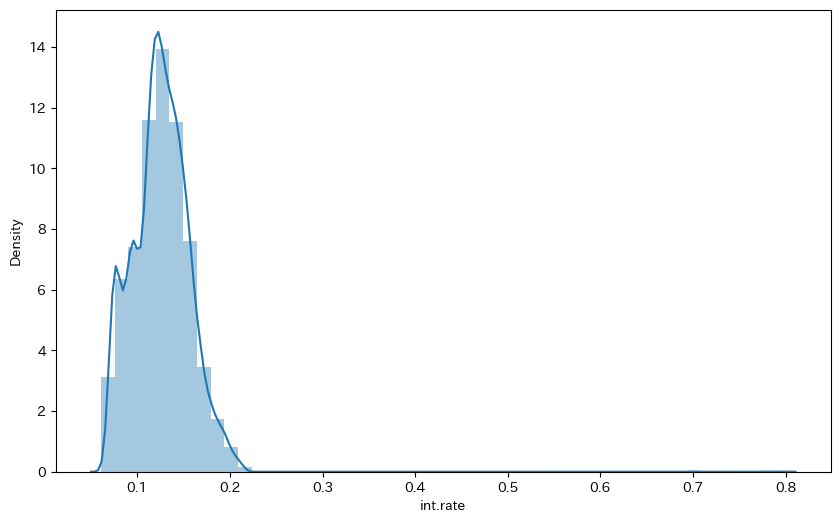

In [18]:
plt.figure(figsize=(10, 6))
sns.distplot(train['int.rate'], kde=True)
plt.show()

In [19]:
train[train['int.rate']>=0.5]

,purpose,int.rate,installment,annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
5622,educational,0.8,193.64,58897.20,9.20,786,3527,2058.0,2.5,0,0,0,0
12083,major_purchase,0.8,139.00,31645.38,14.23,734,3274,3960.0,17.0,3,0,0,0
15638,educational,0.7,60.10,42611.34,18.69,768,13579,23698.0,10.8,0,0,0,0
29492,major_purchase,0.7,229.14,32531.31,0.79,776,3831,3681.0,0.4,0,0,0,0
37598,all_other,0.7,134.99,83138.31,9.62,770,5662,2083.0,8.7,0,0,0,0


In [20]:
test[test['int.rate']>=0.5]

,purpose,int.rate,installment,annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
42566,credit_card,0.9,294.95,28946.89,2.49,709,4711,4280.0,19.8,1,0,0
42968,credit_card,0.9,325.26,106186.12,8.74,740,5494,28786.0,47.3,0,0,0
45396,major_purchase,0.8,73.63,20810.94,3.71,774,5867,2441.0,7.4,0,0,0
50415,credit_card,0.7,132.41,22352.28,22.20,753,5137,7014.0,22.6,0,0,0
57573,all_other,0.9,668.49,197076.92,12.71,754,6000,15047.0,17.0,1,0,0
57655,all_other,0.9,149.43,100687.94,6.27,765,3481,2196.0,2.6,0,0,0
80380,all_other,0.9,503.46,63497.80,7.07,751,10247,5639.0,11.7,0,0,0


In [21]:
train[train['int.rate']<=0.5]['int.rate'].describe()

,int.rate
count,40780.000000
mean,0.125338
std,0.029386
min,0.060800
25%,0.105200
50%,0.125200
75%,0.145100
max,0.216400


In [22]:
train.loc[train['int.rate']>=0.5, 'int.rate'] = 0.1252
test.loc[test['int.rate']>=0.5, 'int.rate'] = 0.1252

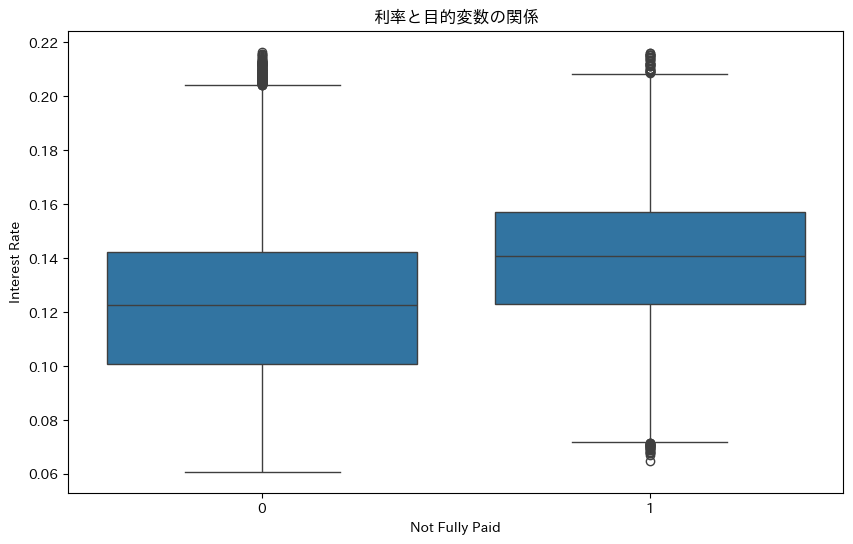

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='not.fully.paid', y='int.rate', data=train)
plt.title('利率と目的変数の関係')
plt.xlabel('Not Fully Paid')
plt.ylabel('Interest Rate')
plt.show()

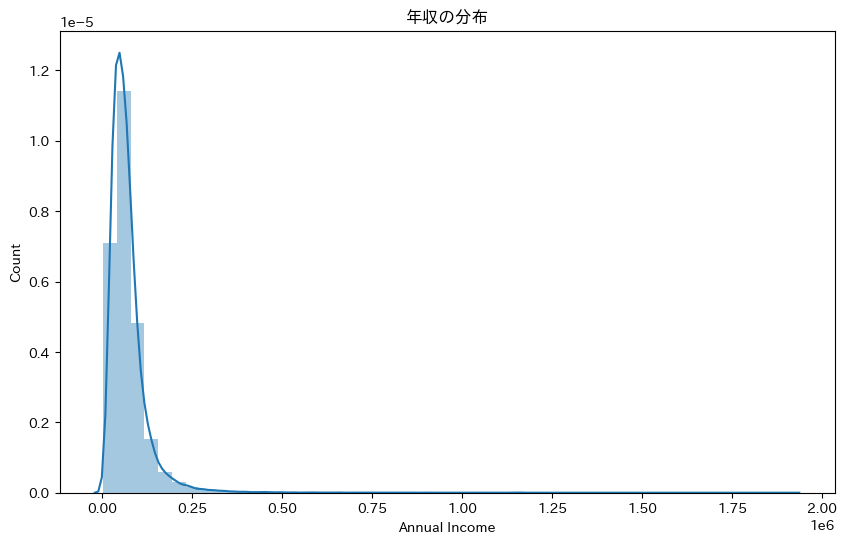

In [24]:
plt.figure(figsize=(10, 6))
sns.distplot(train['annual.inc'], kde=True)
plt.title('年収の分布')
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.show()

In [25]:
train['annual.inc.log'] = np.log1p(train['annual.inc'])
test['annual.inc.log'] = np.log1p(test['annual.inc'])

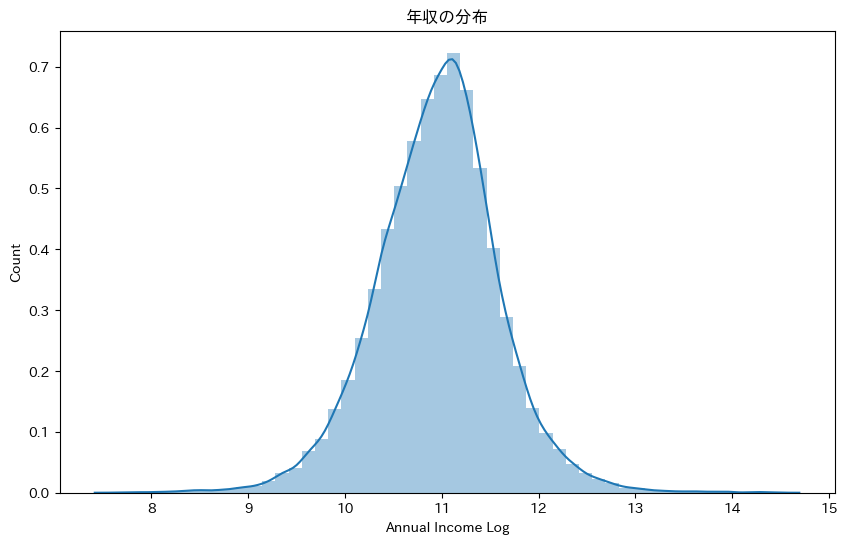

In [26]:
plt.figure(figsize=(10, 6))
sns.distplot(train['annual.inc.log'], kde=True)
plt.title('年収の分布')
plt.xlabel('Annual Income Log')
plt.ylabel('Count')
plt.show()

In [27]:
train.drop('annual.inc', axis=1, inplace=True)
test.drop('annual.inc', axis=1, inplace=True)

In [28]:
train['revol.bal'].fillna(train['revol.bal'].median(), inplace=True)
test['revol.bal'].fillna(test['revol.bal'].median(), inplace=True)

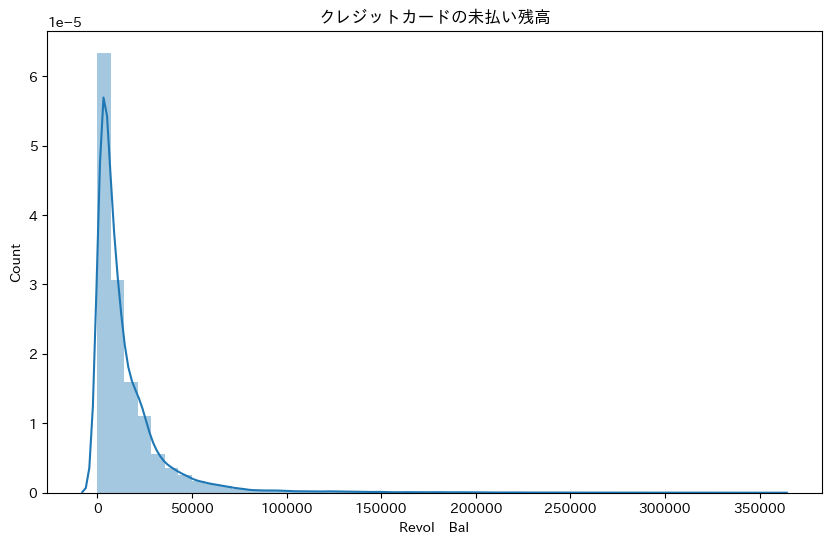

In [29]:
plt.figure(figsize=(10, 6))
sns.distplot(train['revol.bal'], kde=True)
plt.title('クレジットカードの未払い残高')
plt.xlabel('Revol　Bal')
plt.ylabel('Count')
plt.show()

In [30]:
train['revol.bal.log'] = np.log1p(train['revol.bal'])
test['revol.bal.log'] = np.log1p(test['revol.bal'])

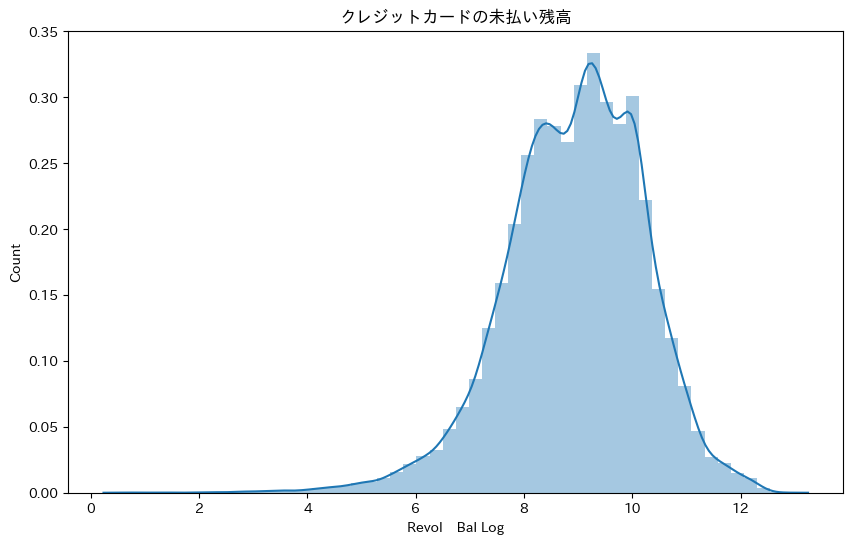

In [31]:
plt.figure(figsize=(10, 6))
sns.distplot(train['revol.bal.log'], kde=True)
plt.title('クレジットカードの未払い残高')
plt.xlabel('Revol　Bal Log')
plt.ylabel('Count')
plt.show()

In [32]:
train.drop('revol.bal', axis=1, inplace=True)
test.drop('revol.bal', axis=1, inplace=True)

In [33]:
train['purpose'].value_counts()

,count
purpose,
debt_consolidation,7686
credit_card,6770
all_other,6155
small_business,5280
home_improvement,5181
educational,4534
major_purchase,4406


In [34]:
train['purpose'].fillna('all_other', inplace=True)
test['purpose'].fillna('all_other', inplace=True)

In [35]:
train = pd.get_dummies(train, columns=['purpose'], dtype=int)
test = pd.get_dummies(test, columns=['purpose'], dtype=int)

In [36]:
train.head()

,int.rate,installment,dti,fico,days.with.cr.line,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,annual.inc.log,revol.bal.log,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,0.1691,652.10,10.66,730,3333,39.6,4,2,0,1,10.294879,8.508354,1,0,0,0,0,0,0
1,0.1354,191.27,13.06,707,6063,37.8,2,1,0,0,10.874455,9.420277,0,0,0,0,0,1,0
2,0.0758,377.00,11.98,736,2681,5.0,1,0,0,0,12.035819,7.317212,0,1,0,0,0,0,0
3,0.1774,359.33,20.55,702,3972,94.1,1,0,0,0,11.175019,10.584992,0,0,1,0,0,0,0
4,0.1430,875.45,17.61,688,5555,56.4,0,0,0,0,11.781233,9.758231,0,1,0,0,0,0,0


In [37]:
train['revol.util'].fillna(train['revol.util'].median(), inplace=True)
test['revol.util'].fillna(test['revol.util'].median(), inplace=True)

In [38]:
train['installment'].fillna(train['installment'].median(), inplace=True)
test['installment'].fillna(test['installment'].median(), inplace=True)

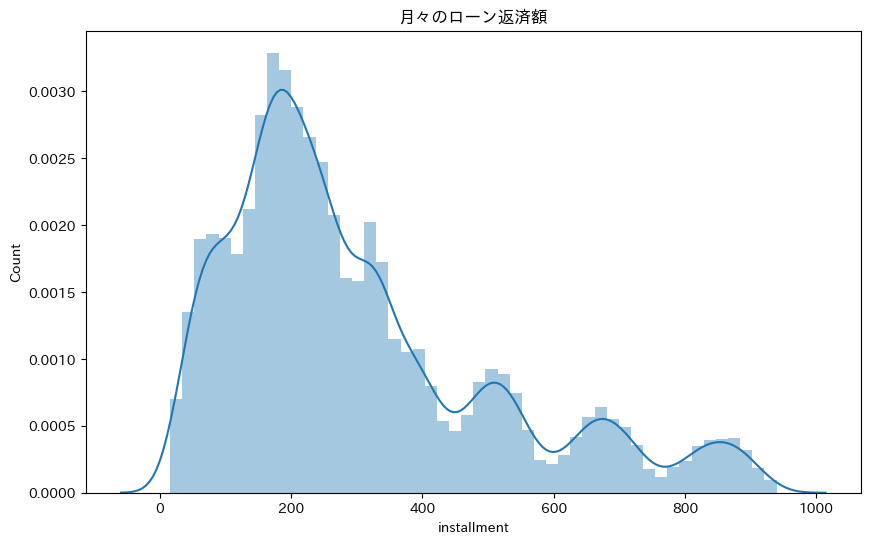

In [39]:
plt.figure(figsize=(10, 6))
sns.distplot(train['installment'], kde=True)
plt.title('月々のローン返済額')
plt.xlabel('installment')
plt.ylabel('Count')
plt.show()

In [40]:
train.isnull().sum()

,0
int.rate,0
installment,0
dti,0
fico,0
days.with.cr.line,0
revol.util,0
inq.last.6mths,0
delinq.2yrs,0
pub.rec,0
not.fully.paid,0


In [41]:
X = train.drop(columns=['not.fully.paid'])
y = train['not.fully.paid']
X_test = test.copy()

In [42]:
ss = StandardScaler()
X_ss = pd.DataFrame(ss.fit_transform(X), columns=X.columns)
X_test_ss = pd.DataFrame(ss.transform(X_test), columns=X_test.columns)

In [43]:
X_ss.head()

,int.rate,installment,dti,fico,days.with.cr.line,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,annual.inc.log,revol.bal.log,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1.489324,1.681210,-0.273803,0.524365,-0.546488,-0.232548,1.193256,3.542098,-0.203315,-1.030512,-0.337911,2.210652,-0.446128,-0.481884,-0.353656,-0.381467,-0.348014,-0.385631
1,0.342425,-0.533762,0.077493,-0.060894,0.516520,-0.296257,0.221937,1.594823,-0.203315,-0.124593,0.373633,-0.452355,-0.446128,-0.481884,-0.353656,-0.381467,2.873447,-0.385631
2,-1.685919,0.358946,-0.080590,0.677042,-0.800364,-1.457177,-0.263722,-0.352453,-0.203315,1.690702,-1.267319,-0.452355,2.241511,-0.481884,-0.353656,-0.381467,-0.348014,-0.385631
3,1.771795,0.274016,1.173829,-0.188124,-0.297674,1.696418,-0.263722,-0.352453,-0.203315,0.345209,1.282421,-0.452355,-0.446128,2.075187,-0.353656,-0.381467,-0.348014,-0.385631
4,0.601073,2.754738,0.743492,-0.544369,0.318715,0.362069,-0.749381,-0.352453,-0.203315,1.292765,0.637327,-0.452355,2.241511,-0.481884,-0.353656,-0.381467,-0.348014,-0.385631


In [44]:
X_train, X_valid, y_train, y_valid = train_test_split(X_ss, y, test_size=0.25, random_state=82, stratify=y) #stratifyをyにして層化を行う

In [45]:
print("分割前", X_ss.shape)
print("分割後", X_train.shape, X_valid.shape)

分割前 (40785, 18)
分割後 (30588, 18) (10197, 18)


In [46]:
model = lgb.LGBMClassifier(class_weight='balanced', random_state=82)
model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 4645, number of negative: 25943
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007855 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2036
[LightGBM] [Info] Number of data points in the train set: 30588, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


LGBMClassifier(class_weight='balanced', random_state=82)

In [47]:
y_pred = model.predict_proba(X_valid)[:, 1]
auc = roc_auc_score(y_valid, y_pred)

In [48]:
print(f'Validation AUC: {auc}')

Validation AUC: 0.7767356397759528


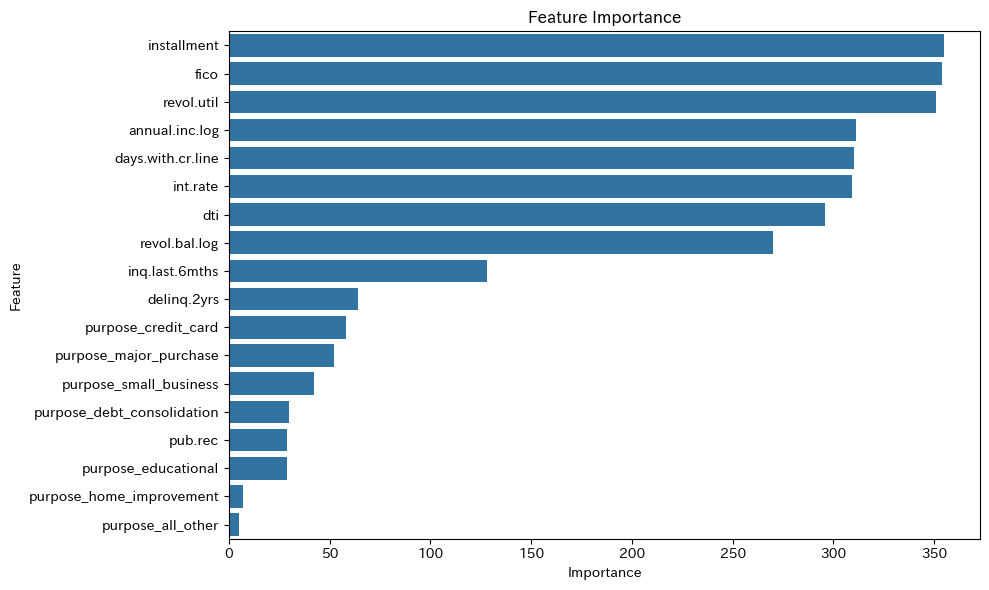

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
# 特徴量重要度を計算
feature_importance = model.feature_importances_

# 特徴量重要度をデータフレームに変換
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# 重要度の高い順にソート
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# 特徴量重要度をプロット
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

In [50]:
# 最適なモデルを使用して予測
test_pred = model.predict_proba(X_test_ss)[:, 1]

In [52]:
submit = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MUFGコンペ/data/sample_submission.csv', header=None)
submit[1] = test_pred
submit.to_csv('/content/drive/MyDrive/Colab Notebooks/MUFGコンペ/data/submission_TamuHide.csv', header=None, index=False)

In [53]:
submit.head()

,0,1
0,40785,0.779996
1,40786,0.417544
2,40787,0.839606
3,40788,0.494486
4,40789,0.495598
